# Week two

# Notes

- A node with a uneven number of links has to be either a starting or a end-point. So in a graph that contains more than two notes with uneven number of links then Each node cannot be visited without using, at least, one link more than once.

## Part 1

#### Chapter 1

 - **List three different real networks and state the nodes and links for each of them.**
    - A cellular network where the nodes are the sendistöð and the links are the wire connecting them together
    - Power grid where the generators and the end user are the nodes and the tranmission lines are the links connecting them together
    - Trade network where the nodes are the sellers and consumers and the links are the transmission system connecting them together
    - The www where the nodes are web documents and the links URLs guaranteed by computer algorithms
    - metabolic network where the notes are tiny molecules and the links are chemical reactions governed by the laws of chemistry and quantum mechanics
 - ** Tell us of the network you are personally most interested in. Address the following questions:**
    - What are its nodes and links?
    - How large is it?
    - Can be mapped out?
    - Why do you care about it?
        - the neuroscience: mapping the brain. The human brain consists of hundreds of billions of interlinked neurons and it is one of the least understood networks. We lack maps telling us which neurons are linked together. Detailed maps of mammalian brains could lead to a revolution in brain science, allowing the understanding and curing of numerous neurological and brain diseases. We do not know exactly how big the network would be and right know it cannot be mapped out. We care about it because a breakthrough in this area could lead to understanding and curing of numerous neurological and brain diseases. The nodes are neurons and the links are the neurotransmitters that the neurons use to connect to each other
 - **In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book.**
     - The impact of a new research field is measured both by its intellectual achievements as well as by its societal impact, idicated by the reach and the potential of its applications
         - Security: Fighting Terrorism page 13
         - Neurosience: Mapping the brain -> this is the shit

#### Chapter 2

** Section 2.5 states that real networks are sparse. Can you think of a real network where each node has many connections? Is that network still sparse? If yes, can you explain why? ** 

Sparse def: thinly scattered or distributed. Not thick or dense; thin

 - We call a network sparse if L << L_max where L is the number of links and L_max = N/2 =  N(N-1)/2.  
 - **Ath svarið við þessarri spurningu :)**

## Part 2

### Tutorial

link to networkX tutorial can be found [here](http://networkx.readthedocs.io/en/stable/tutorial/tutorial.html)

In [29]:
# CREATING AN EMPTY GRAPH

import networkx as nx
G =  nx.Graph()

# By definition a graph is a collection of nodes(vertices) 
#   along with identified pairs of nodes (called edges, links, etc)
# In NetworkX, nodes can be any hashable object e.g. 
#   a text string, an image, an XML object, another Graph, a customized node object

# ADDING A NOTE

# A single node
G.add_node(1)
# Add list of nodes
G.add_nodes_from([2,3])

# nbunch of nodes. An nbunch is any iterable container of nodes that is not itself 
#   a node in the graph. (e.g a list, set, graph, file, etc)

H = nx.path_graph(10)
G.add_nodes_from(H)

# Note that G now contains the nodes of H as nodes of G. 
#   In contrast, you could use the graph H as a node in G.

G.add_node(H)

# ADDING EDGES

G.add_edge(1,2)
e=(2,3)
G.add_edge(*e) # unpack edge tuple, taka svigan í burtu

# A tuple is a comma-separated sequence of values

# Adding a list of edges
G.add_edges_from([(1,2),(1,3)])

# Adding any ebunch of edges
G.add_edges_from(H.edges())

# Remove edges
G.remove_node(H)
G.clear()

# if we add already existing nodes or edges Network X quielty ignores any that are already present
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node("spam")       # adds node "spam"
G.add_nodes_from("spam") # adds 4 nodes: 's', 'p', 'a', 'm'

# Finding the number of edges and notes
G.number_of_nodes()
G.number_of_edges()

# Examine the notes
G.nodes()
G.edges()
G.neighbors(1)

# Removing nodes or edges has similar syntax to adding:
G.remove_nodes_from("spam")
G.nodes() #[1, 2, 3, 'spam']
G.remove_edge(1,3)

# When creating a graph structure bu instantiating one of the graph classes you can 
#   specify data in several formats

H=nx.DiGraph(G)   # create a DiGraph using the connections from G
H.edges()
#[(1, 2), (2, 1)]
edgelist=[(0,1),(1,2),(2,3)]
H=nx.Graph(edgelist)

# You can safely set the attributes of an edge using subscript notation 
#  if the edge already exists

G.add_edge(1,3)
G[1][3]['color']='blue'




#### Fast examination

In [38]:
# FAST EXAMINATION

#Fast examination of all edges is achieved using adjacency iterators. 
#  Note that for undirected graphs this actually looks at each edge twice.

FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125),(1,3,0.75),(2,4,1.2),(3,4,0.375)])
for n,nbrs in FG.adjacency_iter():
    for nbr,eattr in nbrs.items():
        data=eattr['weight']
        if data<0.5: print('(%d, %d, %.3f)' % (n,nbr,data))
            
print          
        
# Convenient access to all edges is achieved with the edges method
for (u,v,d) in FG.edges(data='weight'):
     if d<0.5: print('(%d, %d, %.3f)'%(n,nbr,d))
# (1, 2, 0.125)
# (3, 4, 0.375)

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)

(4, 3, 0.125)
(4, 3, 0.375)


#### Adding attributes to graphs, nodes and edges

In [51]:
# ADDING ATTRIBUTES TO GRAPHS, NODES, AND EDGES

# Attributes such as weights, labels, colors, or whatever Python object you like, 
#   can be attached to graphs, nodes, or edges.

# Each graph, node, and edge can hold key/value attribute pairs in an associated attribute 
#   dictionary (the keys must be hashable). By default these are empty, 
#   but attributes can be added or changed using add_edge,
#   add_node or direct manipulation of the attribute dictionaries named G.graph, 
#   G.node and G.edge for a graph G.

# GRAPH ATTRIBUTE
# Assign graph attributes when creating a new graph
G = nx.Graph(day="Friday")
G.graph

# Or you can modify attributes later
G.graph['day']='Monday'
G.graph

# NOTE ATTRIBUTE
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.node[1]
# {'time': '5pm'}
G.node[1]['room'] = 714
G.nodes(data=True)
#[(1, {'room': 714, 'time': '5pm'}), (3, {'time': '2pm'})]

# EDGE ATTRIBUTES
# Add edge attributes using add_edge(), add_edges_from(), subscript notation, or G.edge.

G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3,4),(4,5)], color='red')
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])
G[1][2]['weight'] = 4.7
G.edge[1][2]['weight'] = 4

# The special attribute ‘weight’ should be numeric and 
#   holds values used by algorithms requiring weighted edges

#### Directed graphs

In [53]:
# To allow algorithms to work with both classes easily, 
#   the directed versions of neighbors() and degree() 
#   are equivalent to successors() and the sum of in_degree() 
#  and out_degree() respectively even though that may feel inconsistent at times.

DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
DG.out_degree(1,weight='weight')
#0.5
DG.degree(1,weight='weight')
#1.25
DG.successors(1)
#[2]
DG.neighbors(1)

# Convert a directed graph to undirected graph
H = nx.Graph(G) # convert G to undirected graph


#### Multigraphs

In [56]:
# NetworkX provides classes for graphs which allow multiple edges between any pair of nodes.
#   The MultiGraph and MultiDiGraph classes allow you to add the same edge twice, 
#   possibly with different edge data

MG=nx.MultiGraph()
MG.add_weighted_edges_from([(1,2,.5), (1,2,.75), (2,3,.5)])
MG.degree(weight='weight')
# {1: 1.25, 2: 1.75, 3: 0.5}
GG=nx.Graph()
for n,nbrs in MG.adjacency_iter():
    for nbr,edict in nbrs.items():
        print nbrs.items()
        minvalue=min([d['weight'] for d in edict.values()])
        GG.add_edge(n,nbr, weight = minvalue)

nx.shortest_path(GG,1,3)
#[1, 2, 3]

[(2, {0: {'weight': 0.5}, 1: {'weight': 0.75}})]
[(1, {0: {'weight': 0.5}, 1: {'weight': 0.75}}), (3, {0: {'weight': 0.5}})]
[(1, {0: {'weight': 0.5}, 1: {'weight': 0.75}}), (3, {0: {'weight': 0.5}})]
[(2, {0: {'weight': 0.5}})]


[1, 2, 3]

#### Analysing graphs

In [58]:
G=nx.Graph()
G.add_edges_from([(1,2),(1,3)])
G.add_node("spam")       # adds node "spam"

nx.connected_components(G)
# [[1, 2, 3], ['spam']]

sorted(nx.degree(G).values())
# [0, 1, 1, 2]

nx.clustering(G)
# {1: 0.0, 2: 0.0, 3: 0.0, 'spam': 0.0}

# Functions that return node properties return dictionaries keyed by node label.
 nx.degree(G) # {1: 2, 2: 1, 3: 1, 'spam': 0}
    
# For values of specific nodes, you can provide a single node or an nbunch of nodes as argument. 
# If a single node is specified, then a single value is returned. 
# If an nbunch is specified, then the function will return a dictionary.  

nx.degree(G,1)
# 2
G.degree(1)
#2
G.degree([1,2])
#{1: 2, 2: 1}
sorted(G.degree([1,2]).values())
#[1, 2]
sorted(G.degree().values())
#[0, 1, 1, 2]


<generator object connected_components at 0x10d4e85a0>

#### Drawing graphs

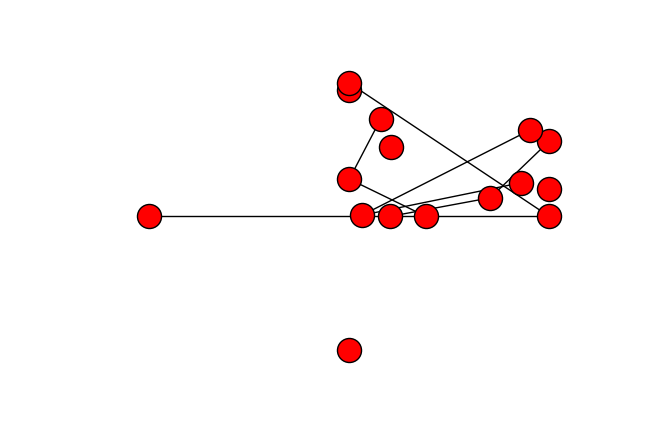

In [66]:
import matplotlib.pyplot as plt

nx.draw(G)
# nx.draw(G)
# nx.draw_random(G)
# nx.draw_circular(G)

plt.show()

# Save drawing to a file

nx.draw(G)
plt.savefig("path.png")


# writes to the file “path.png” in the local directory. 
# If Graphviz and PyGraphviz, or pydotplus, are available on your system, you can also use
from networkx.drawing.nx_pydot import write_dot
nx.draw_graphviz(G)
write_dot(G,'file.dot')

### NS Section 2.12: Homework

#### Exercise 2.1
 - A) is possible because it has only two notes with odd number of edges/links
 - B) is not possible
 - C) is possible
 - D) is possible


#### Exercise 2.3

- **e)**: That you have a isolated cluster of one note in the network (note 5)
- **f)**: in a) it is one but n b) there is no path of length 3 from 1 to 3

G1 adjency matrix: 

[[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

 G1 link list: 

[(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]

 G1 average clustering coefficient: 

0.638888888889


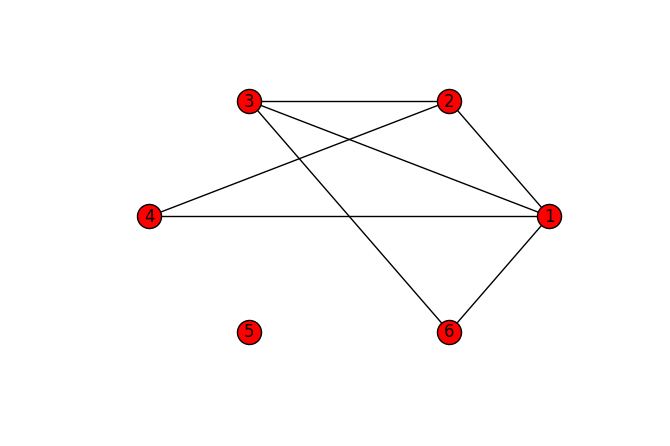

In [89]:
# A B C) First graph
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

G1.clear()

G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5,6])
G1.add_edges_from([(1,2),(1,3),(2,3),(1,6),(6,3),(2,4),(1,4)])
G1.node[1]["nr"] = 1
G1.node[2]["nr"] = 2
G1.node[3]["nr"] = 3
G1.node[4]["nr"] = 4
G1.node[5]["nr"] = 5
G1.node[6]["nr"] = 6

# Print adjency matrix
A1 = nx.adjacency_matrix(G1)
print "G1 adjency matrix: \n"
print(A1.todense())

print "\n G1 link list: \n"
print G1.edges()

print "\n G1 average clustering coefficient: \n"
print nx.average_clustering(G1)



nx.draw_circular(G1,with_labels=True)
plt.show()

G2 adjency matrix: 

[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]

 G2 link list: 

[(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]


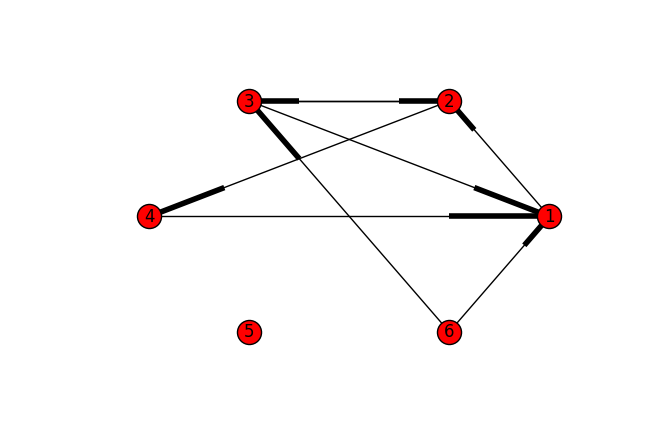

In [94]:
# A B C) Second graph

import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

G2.clear()

G2 = nx.DiGraph()
G2.add_nodes_from([1,2,3,4,5,6])
G2.add_edges_from([(1,2),(2,3),(2,4),(3,1),(3,2),(4,1),(6,3),(6,1)])
G2.node[1]["nr"] = 1
G2.node[2]["nr"] = 2
G2.node[3]["nr"] = 3
G2.node[4]["nr"] = 4
G2.node[5]["nr"] = 5
G2.node[6]["nr"] = 6

# Print adjency matrix
A2 = nx.adjacency_matrix(G2)
print "G2 adjency matrix: \n"
print(A2.todense())

print "\n G2 link list: \n"
print G2.edges()


nx.draw_circular(G2,with_labels=True)
plt.show()


#### Exercise 2.5

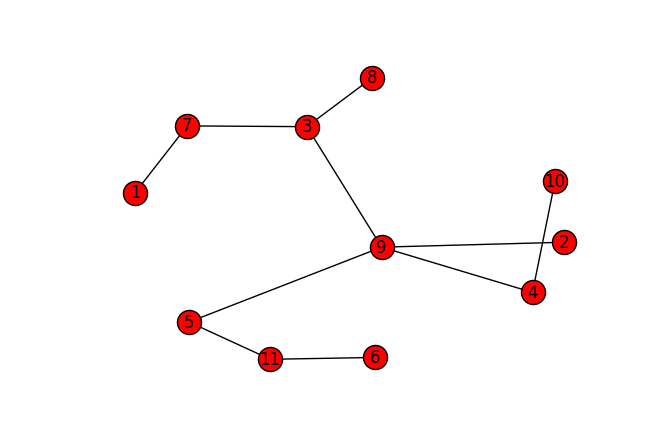

G2 adjency matrix: 

[[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [109]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11])
G.add_edges_from([
        (1,7),
        (2,9),
        (3,7),
        (3,8),
        (3,9),
        (4,9),
        (4,10),
        (5,9),
        (5,11),
        (6,11)
    ])

nx.draw(G,with_labels=True)
plt.show()

A2 = nx.adjacency_matrix(G2)
print "G2 adjency matrix: \n"
print(A2.todense())


list